In [180]:
import pandas as pd

from random import randint
data_inicio = pd.Timestamp('2020-01-01 00:00:00')
leng = 60

timestamp = [data_inicio + pd.DateOffset(months=mes) for mes in range(0,leng)]
valor = [(x + randint(x-10, x+20))*1.1 for x in range(len(timestamp))]

df = pd.DataFrame({'timestamp':timestamp, 'valor':valor})
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df.to_csv('series.csv')

In [185]:
df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df.head()

,valor
timestamp,
2020-01-01,4.4
2020-02-01,6.6
2020-03-01,4.4
2020-04-01,9.9
2020-05-01,24.2


## Modelo Naive

In [112]:
df['naive'] = df.valor.shift(1)
df.head()

,valor,naive
timestamp,,
2020-01-01,-4.4,NaN
2020-02-01,2.2,-4.4
2020-03-01,4.4,2.2
2020-04-01,15.4,4.4
2020-05-01,25.3,15.4


<AxesSubplot:>

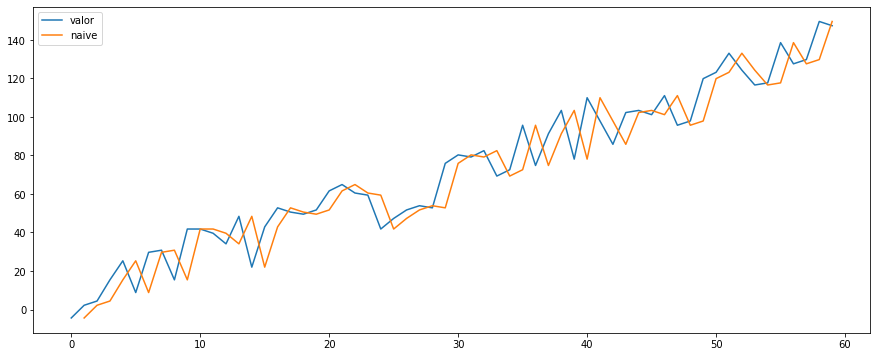

In [71]:
df.plot(figsize=(15,6))

## Validação - Erro médio quadrático

In [113]:
erro = (df.valor - df.naive) ** 2
erro.mean()

174.3630508474576

## Modelo AutoRegressivo

In [184]:
import pandas as pd
df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
df['x1'] = df.valor.shift(1)
df.dropna(axis=0, inplace=True)
df.head()

,valor,x1
timestamp,,
2020-02-01,6.6,4.4
2020-03-01,4.4,6.6
2020-04-01,9.9,4.4
2020-05-01,24.2,9.9
2020-06-01,0.0,24.2


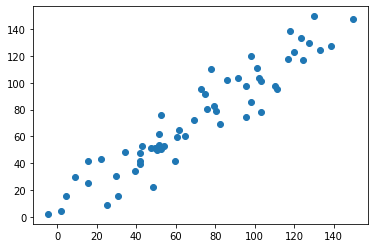

In [116]:
import matplotlib.pyplot as plt
plt.scatter(df.x1, df.valor)

In [117]:
from sklearn.linear_model import LinearRegression

X = df.x1.values # VALUES retorna um array
y = df.valor.values
reg = LinearRegression().fit(X.reshape(-1, 1), y)
previsoes = reg.predict(X.reshape(-1, 1))
((y - previsoes) ** 2).mean()

162.74122606952687

Text(0, 0.5, 'valor')

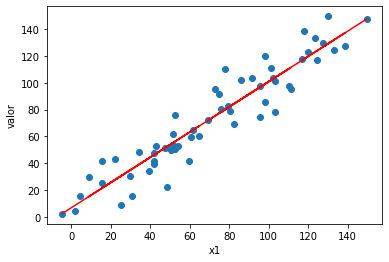

In [118]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('valor')

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

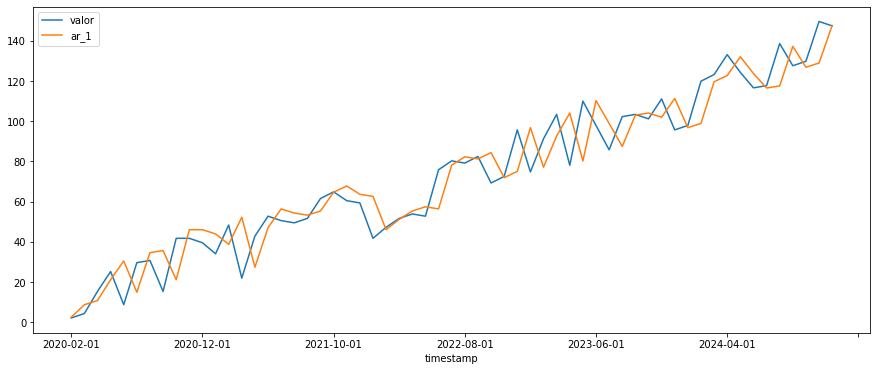

In [121]:
df['ar_1'] = previsoes
df[['valor', 'ar_1']].plot(figsize=(15,6))

In [123]:
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
ar_2 = AR(df.valor).fit(2)

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [124]:
# Erros residuais
ar_2.resid.head()

timestamp
2020-03-01    -0.808236
2020-04-01     6.181207
2020-05-01     9.183785
2020-06-01   -17.376537
2020-07-01     8.231583
dtype: float64

In [125]:
# Erro médio quadrático
(ar_2.resid ** 2).mean()

135.53734466425163

In [126]:
# Estatísticas descritivas do erro
ar_2.resid.describe()

count    5.800000e+01
mean    -8.269247e-15
std      1.174373e+01
min     -2.467500e+01
25%     -6.743531e+00
50%     -6.989973e-01
75%      7.868905e+00
max      2.088324e+01
dtype: float64

<AxesSubplot:>

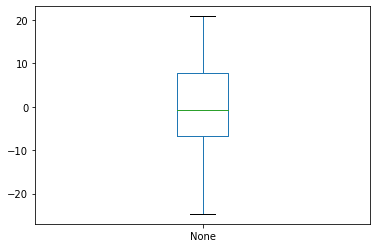

In [127]:
ar_2.resid.plot(kind='box')

<AxesSubplot:>

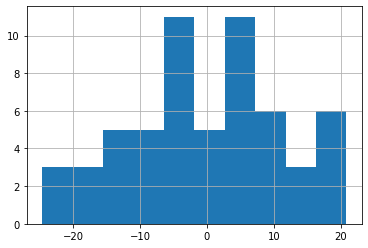

In [128]:
ar_2.resid.hist()

In [3]:
import pandas as pd
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
ar_3 = AR(df.valor, freq='MS').fit(3)
(ar_3.resid ** 2).mean()

119.64490740029296

<AxesSubplot:xlabel='timestamp'>

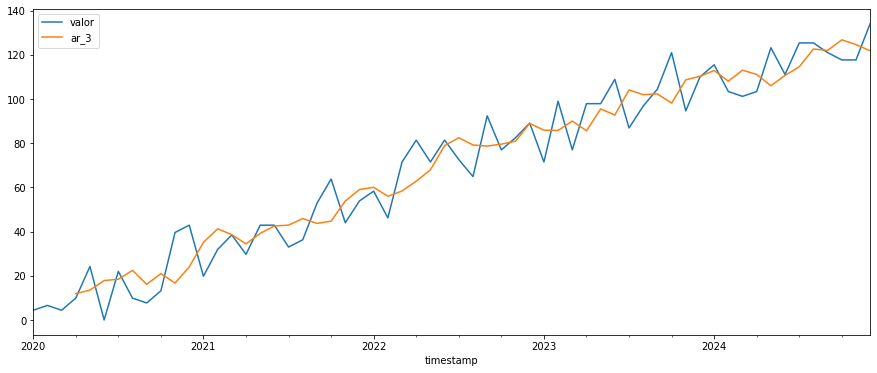

In [4]:
df['ar_3'] = ar_3.predict()
df.plot(figsize=(15,6))

In [172]:
ar_3.predict(start='2025-01-01', end='2025-01-01')

2025-01-01    143.568064
Freq: MS, dtype: float64

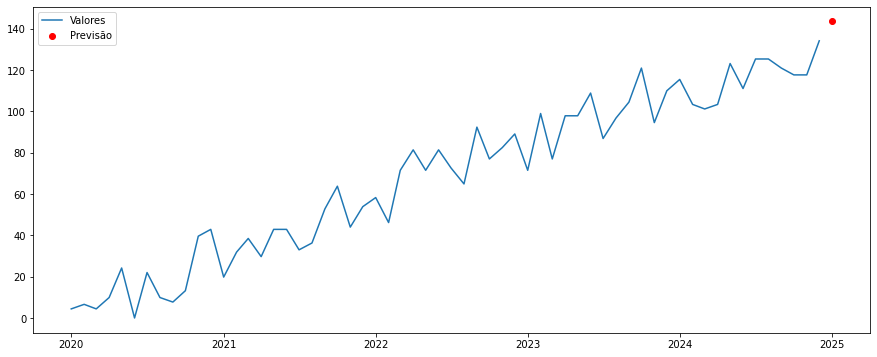

In [188]:
plt.figure(figsize=(15, 6))
plt.plot(df.valor)
forecast = ar_3.predict(start='2025-01', end='2025-01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Valores', 'Previsão'])

In [198]:
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
ar_10 = AR(df.valor, freq='MS').fit(10)
(ar_10.resid ** 2).mean()

77.49180066214825

In [200]:
ar_10.predict(start='2025-01-01', end='2025-01-01')

2025-01-01    127.620041
Freq: MS, dtype: float64

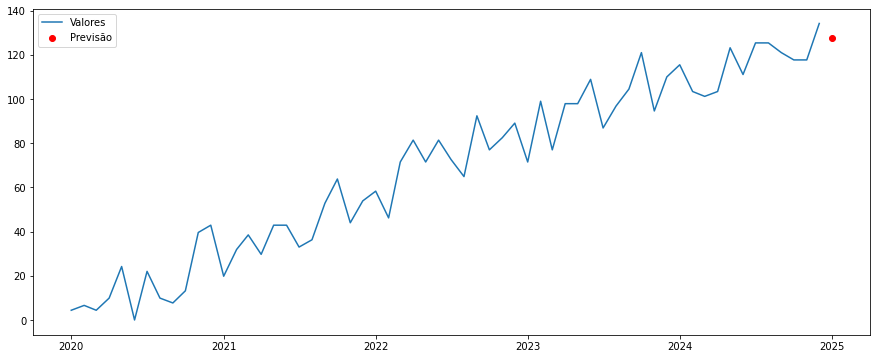

In [199]:
plt.figure(figsize=(15, 6))
plt.plot(df.valor)
forecast = ar_10.predict(start='2025-01', end='2025-01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Valores', 'Previsão'])

In [213]:
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('series.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp', inplace=True)
ar_29 = AR(df.valor, freq='MS').fit(29)
(ar_29.resid ** 2).mean()

17.853954539993538

In [214]:
ar_29.predict(start='2025-01-01', end='2025-01-01')

2025-01-01    124.033883
Freq: MS, dtype: float64

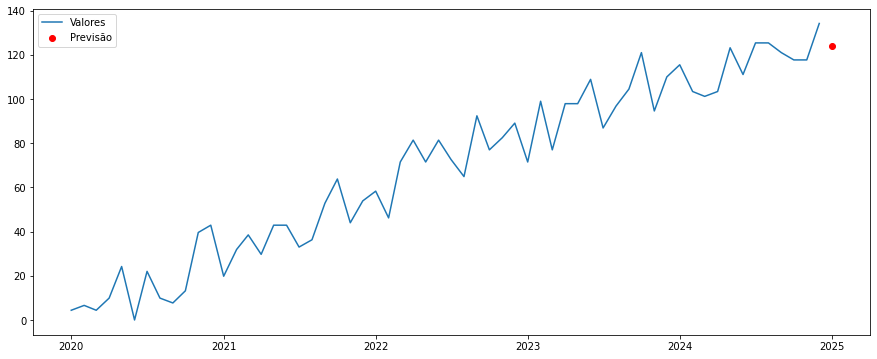

In [215]:
plt.figure(figsize=(15, 6))
plt.plot(df.valor)
forecast = ar_29.predict(start='2025-01', end='2025-01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['Valores', 'Previsão'])